In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier    

## Dicionário de Dados:

Medidas de 11 variáveis ​​que caracterizam cada amostra (as características do problema):

1 - (Age) - Idade: idade do paciente (anos)

2 - (Sex) - Sexo: sexo do paciente (M: Masculino, F: Feminino)

3 - ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)

4 - RestingBP: pressão arterial em repouso (mm Hg)

5 - Colesterol: colesterol sérico (mm/dl)

6 - (FastingBS) - JejumBS: glicemia em jejum (1: se JejumBS > 120 mg/dl, 0: caso contrário)

7 - (RestingECG) - ECG em repouso: resultados de ECG em repouso (Normal: normal, ST: com anormalidade da onda ST-T, HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)

8 - MaxFC: frequência cardíaca máxima atingida (valor numérico entre 60 e 202)

9 - ExerciseAngina: angina induzida por exercício (S: Sim, N: Não)

10 - Oldpeak: old peak = ST (Valor numérico medido em depressão)

11 - ST_Slope: a inclinação do segmento ST do exercício de pico (subida ascendente, plana: plana, descendente descendente)

Além disso, existe a variável resposta, que neste caso é uma variável binária:

12 - HeartDisease: classe de saída (1: cardiopatia, 0: normal)

In [3]:
#Carregando dados
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.duplicated().sum() #verificação de valores duplicados

0

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.HeartDisease.value_counts() #Verificando o balanceamento da variável target

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


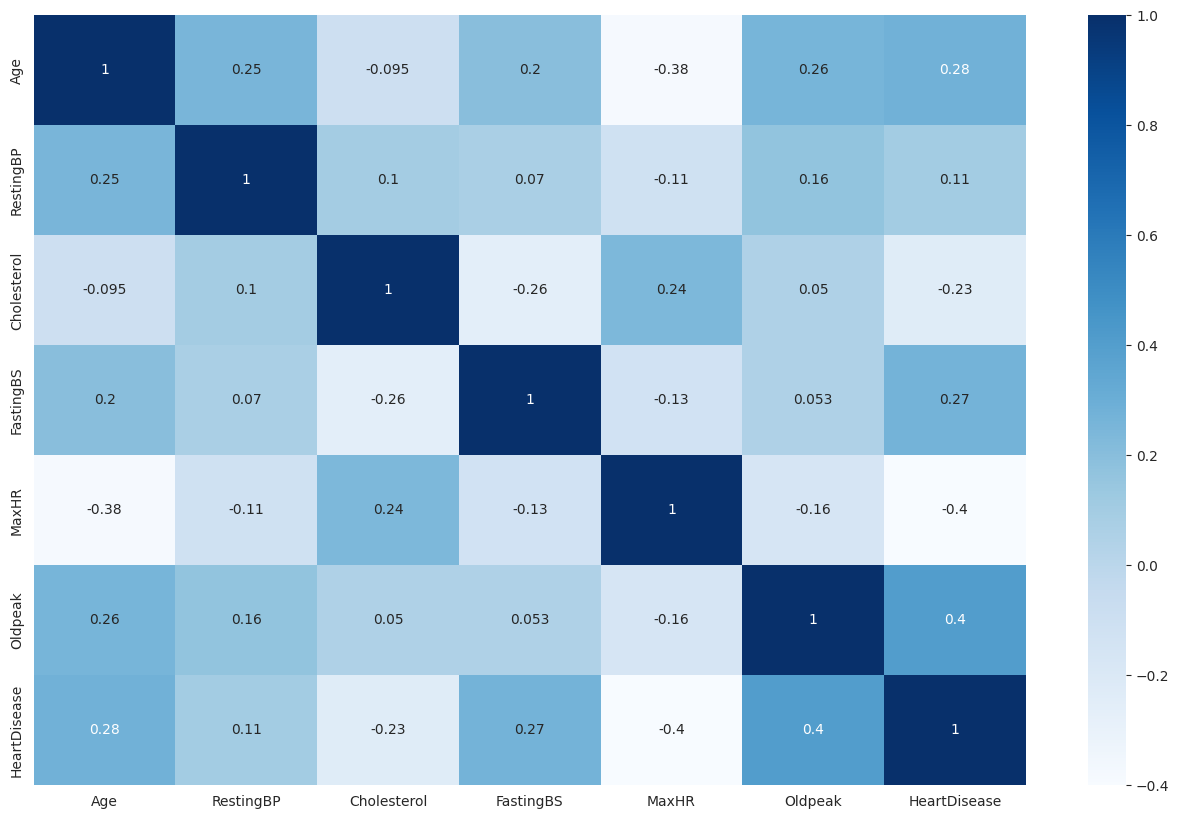

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'Blues')
plt.show()

In [12]:
for c in df.columns:
    print(f"{c}: {df[c].nunique()}")

Age: 50
Sex: 2
ChestPainType: 4
RestingBP: 67
Cholesterol: 222
FastingBS: 2
RestingECG: 3
MaxHR: 119
ExerciseAngina: 2
Oldpeak: 53
ST_Slope: 3
HeartDisease: 2


In [13]:
categoricas = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numericas = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
target = ['HeartDisease']

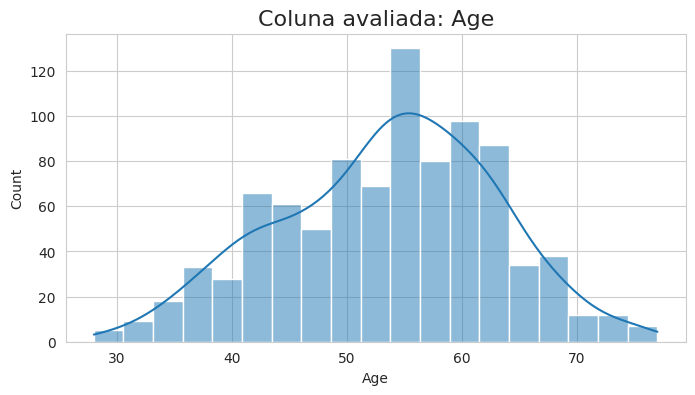

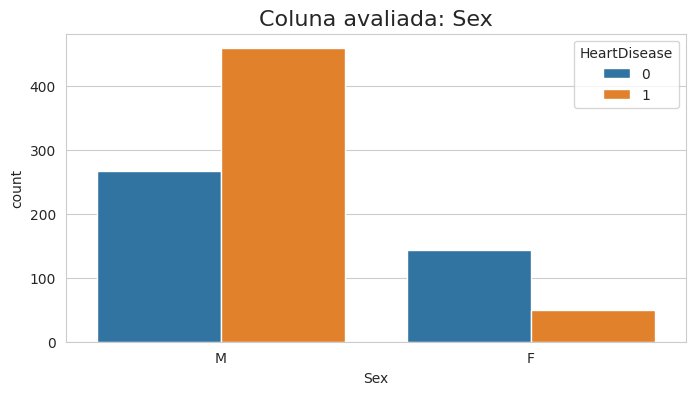

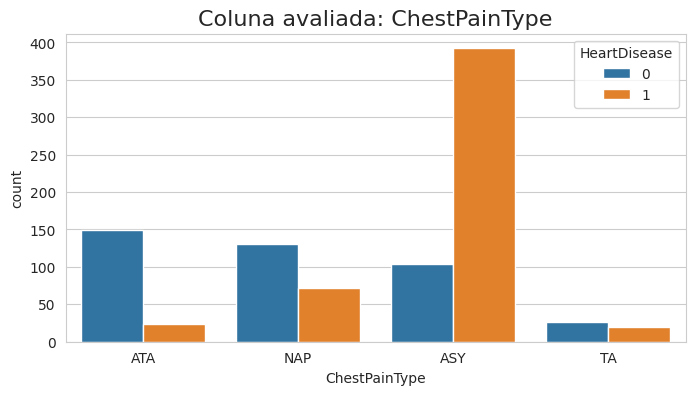

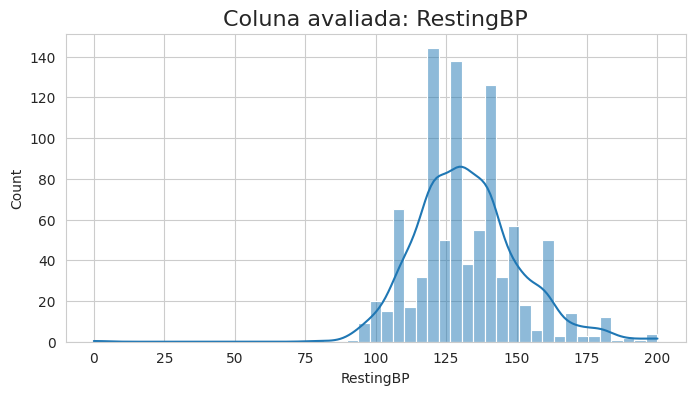

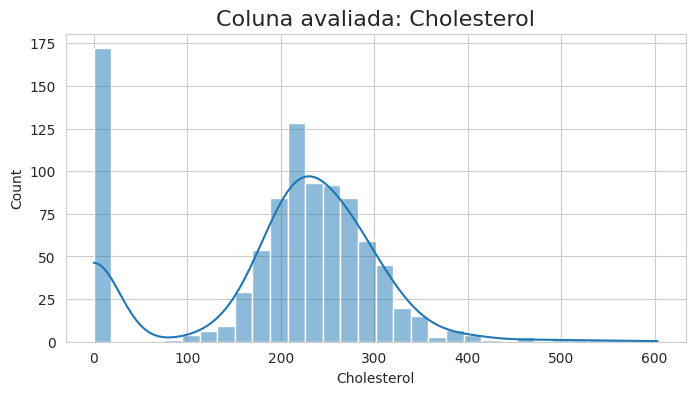

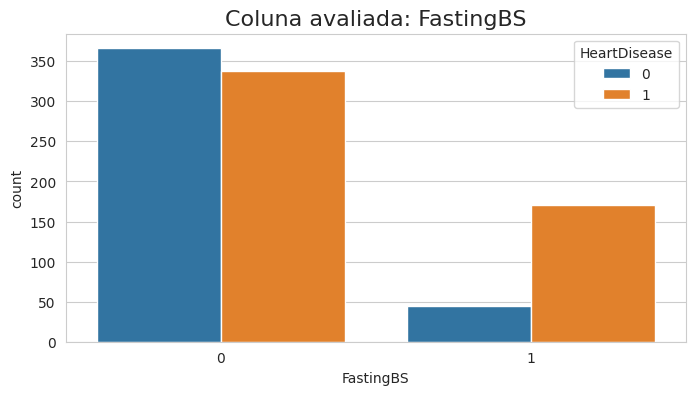

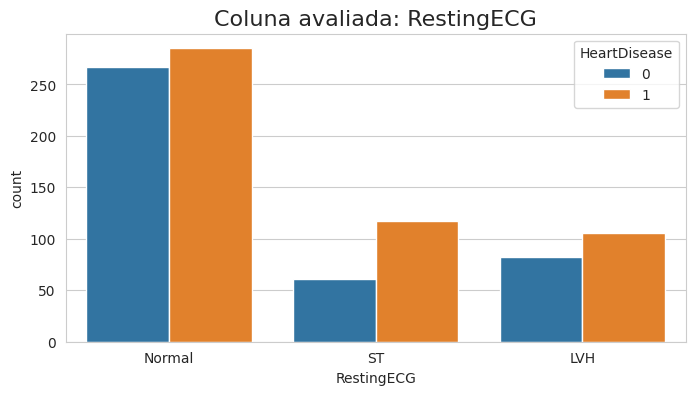

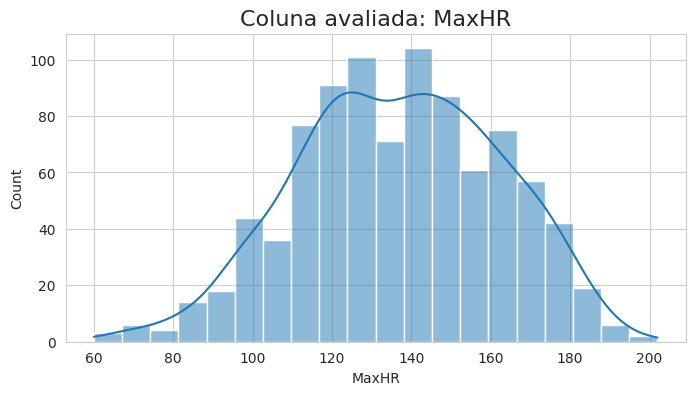

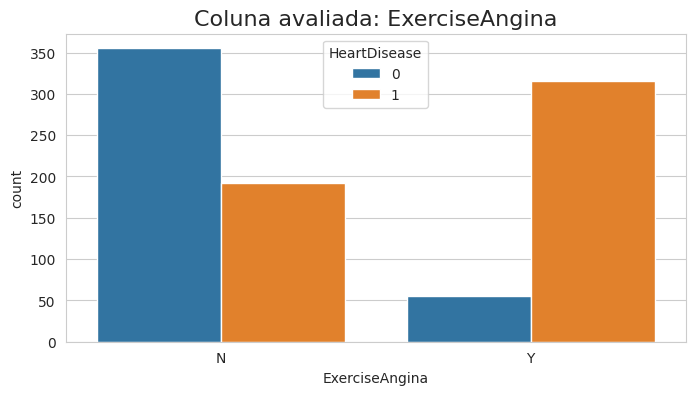

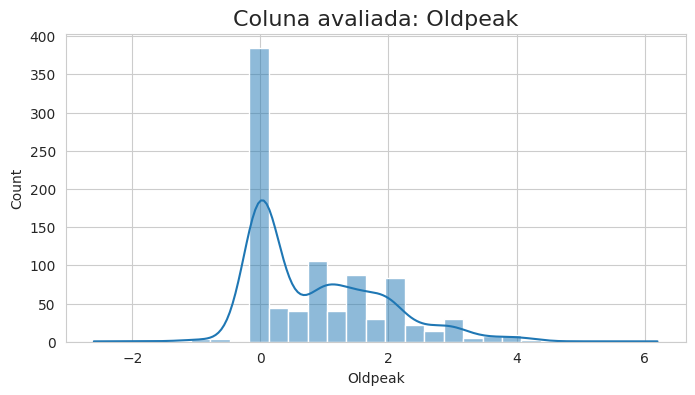

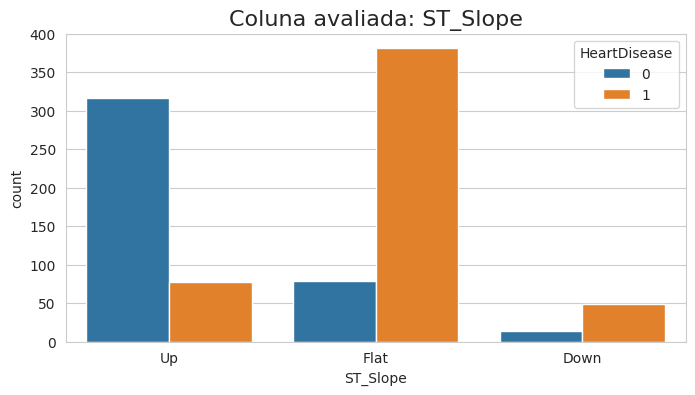

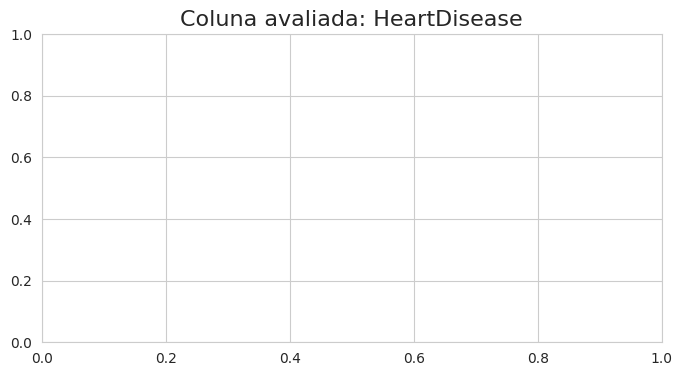

In [14]:
for c in df.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = df[c], hue = df['HeartDisease'])
    if c in numericas:
        sns.histplot(df[c], kde = True)
    

## Removendo Outliers:

<Axes: >

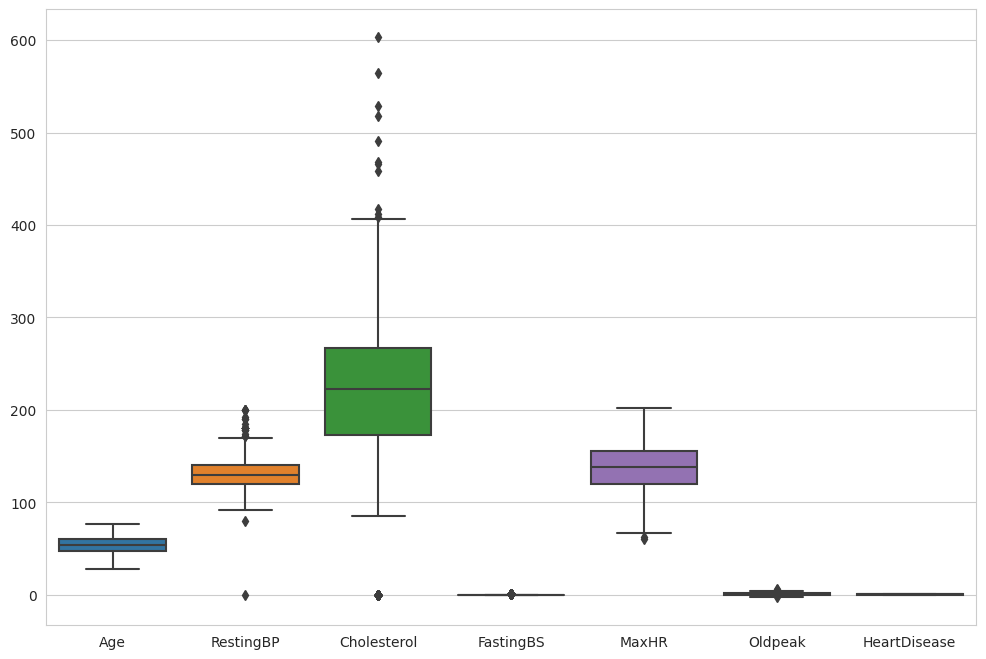

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [16]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
df2 = df[(df.RestingBP < 160.0) & (df.RestingBP > 90.0)]

In [18]:
df3 = df2[(df.Cholesterol > 120) & (df.Cholesterol < 350)]

/tmp/ipykernel_19426/3705835903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df.Cholesterol > 120) & (df.Cholesterol < 350)]


In [19]:
df3.reset_index()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
641,914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
642,915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
643,916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

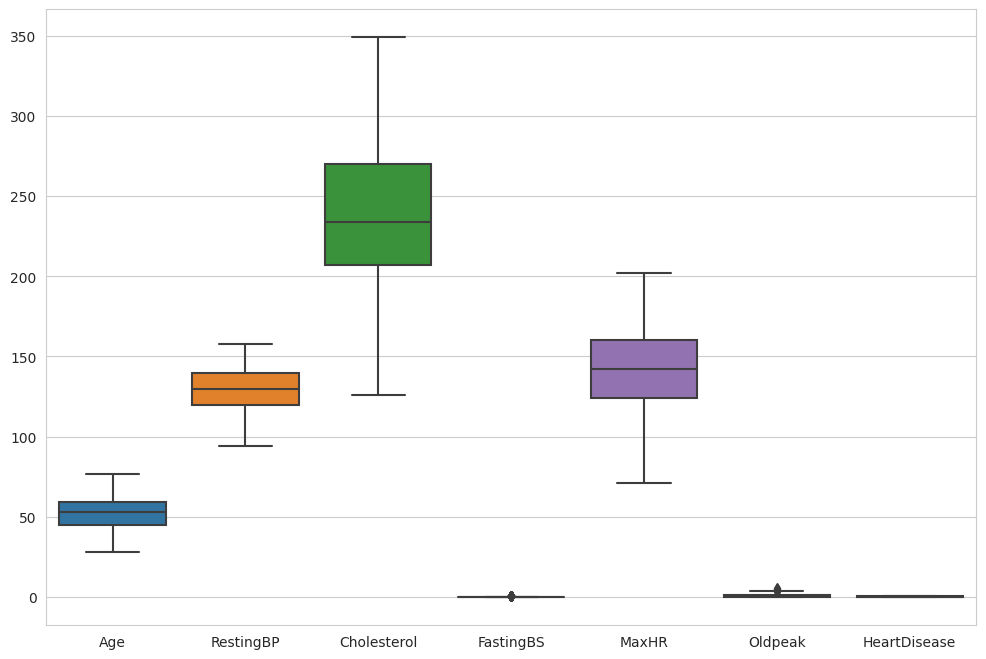

In [20]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df3)

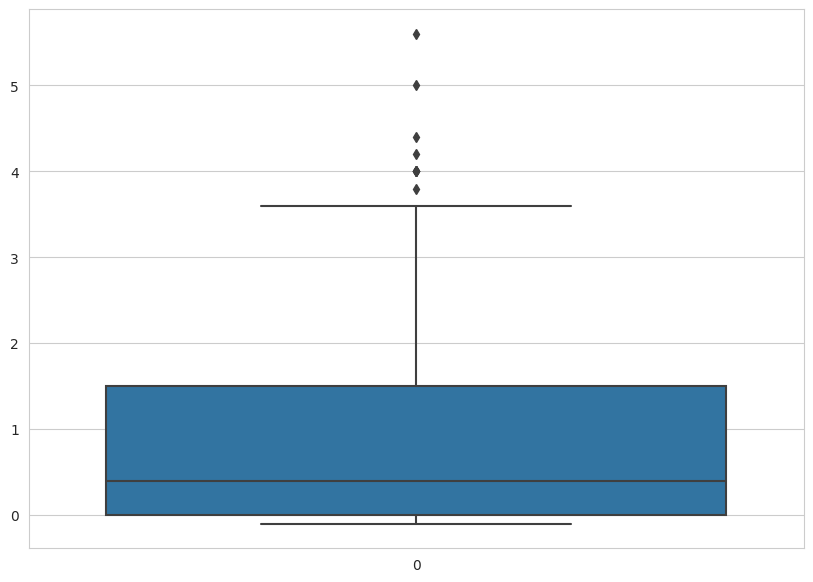

In [21]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df3.Oldpeak)
plt.show()

<Axes: >

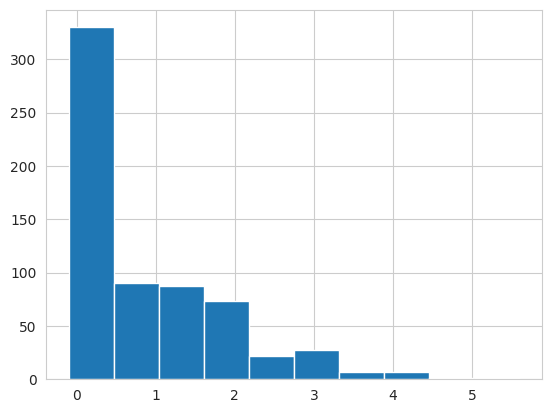

In [22]:
df3.Oldpeak.hist() #Variável Extremamente Desbalanceada...

In [23]:
df3.loc[:]['Sex'].replace(to_replace = ['M','F'], value = [1,0], inplace = True ) 
df3.loc[:]['ChestPainType'].replace(to_replace = ['ATA', 'ASY', 'NAP', 'TA'], value = [0,1,2,3], inplace = True ) 
df3.loc[:]['RestingECG'].replace(to_replace = ['Normal','ST', 'LVH'], value = [0,1,2], inplace = True ) 
df3.loc[:]['ExerciseAngina'].replace(to_replace = ['N' ,'Y'], value = [0,1], inplace = True )
df3.loc[:]['ST_Slope'].replace(to_replace = ['Down','Flat','Up'], value = [0,1,2], inplace = True )


In [24]:
for c in df.columns:
    print(f"{c}: {df3[c].unique()}")

Age: [40 37 48 54 39 45 58 49 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 28 62 77 67 72 64 69 75 68 74 71 70 76]
Sex: [1 0]
ChestPainType: [0 1 2 3]
RestingBP: [140 130 138 150 120 110 136 115 100 124 125 112 132 142 118 135 108 145
 155 128 106 122  98 105 133 126 139 134 152 141 137 146 158 123  96 144
 131 143 116 156 114 127 101 104  94 148 117 129 102 154]
Cholesterol: [289 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248 267
 223 184 288 215 209 260 188 167 224 172 186 254 306 250 177 227 230 294
 264 259 175 318 216 340 233 205 245 180 270 213 342 253 277 202 297 225
 265 182 218 268 163 206 238 139 291 229 307 210 263 269 275 179 129 255
 276 246 282 338 160 156 272 240 161 228 292 241 166 247 341 243 279 198
 249 168 159 190 185 290 212 231 222 235 320 187 266 287 194 251 328 192
 308 219 257 132 226 280 217 298 256 295 173 315 281 309 200 336 326 171
 271 274 221 126 193 220 242 344 169 181 236 203 153 316 311 252 258 305


In [25]:
df3.reset_index()


,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,1,0,140,289,0,0,172,0,0.0,2,0
1,2,37,1,0,130,283,0,1,98,0,0.0,2,0
2,3,48,0,1,138,214,0,0,108,1,1.5,1,1
3,4,54,1,2,150,195,0,0,122,0,0.0,2,0
4,5,39,1,2,120,339,0,0,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,913,45,1,3,110,264,0,0,132,0,1.2,1,1
641,914,68,1,1,144,193,1,0,141,0,3.4,1,1
642,915,57,1,1,130,131,0,0,115,1,1.2,1,1
643,916,57,0,0,130,236,0,2,174,0,0.0,1,1


In [26]:
df3.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,2,0
2,37,1,0,130,283,0,1,98,0,0.0,2,0
3,48,0,1,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,2,0
5,39,1,2,120,339,0,0,170,0,0.0,2,0


In [28]:
X = df3.drop(target, axis = 1).reset_index()
Y = df3[target].reset_index()


In [29]:
X.head()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0,40,1,0,140,289,0,0,172,0,0.0,2
1,2,37,1,0,130,283,0,1,98,0,0.0,2
2,3,48,0,1,138,214,0,0,108,1,1.5,1
3,4,54,1,2,150,195,0,0,122,0,0.0,2
4,5,39,1,2,120,339,0,0,170,0,0.0,2


In [30]:
Y.head()

,index,HeartDisease
0,0,0
1,2,0
2,3,1
3,4,0
4,5,0


In [31]:
X.drop(columns = 'index', inplace=True) #Removendo coluna duplicada de índice e corrigindo a sequencia...
Y.drop(columns = 'index', inplace=True)


In [32]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,0,0.0,2
1,37,1,0,130,283,0,1,98,0,0.0,2
2,48,0,1,138,214,0,0,108,1,1.5,1
3,54,1,2,150,195,0,0,122,0,0.0,2
4,39,1,2,120,339,0,0,170,0,0.0,2


In [33]:
Y.head()

,HeartDisease
0,0
1,0
2,1
3,0
4,0


# Modelos Básicos para análise inicial:

In [34]:
def Auto_ml(X, Y, algoritmo, opt = 1):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    
    if opt == 1:
        ml = algoritmo()
        
    elif opt == 2:
        ml = algoritmo(n_estimators = 1000)
        
    elif opt == 3:
        ml = algoritmo(max_iter = 1000)
    
    ml.fit(x_train, y_train.values.ravel())
    
    score_train = ml.score(x_train, y_train)
    print(f"Acurácia treino: {score_train*100:.2f}%")
    
    score_test = ml.score(x_test, y_test)
    print(f"Acurácia Teste: {score_test*100:.2f}%")
    
    y_predict = ml.predict(x_test)
    
    print("--- Classification report ---")
    print(classification_report(y_test, y_predict))
    
    m_confusion = confusion_matrix(y_test, y_predict)
    print("--- Confusion Matrix ---")
    
    sns.heatmap(m_confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test
    
        

Acurácia treino: 83.15%
Acurácia Teste: 85.57%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       108
           1       0.87      0.79      0.83        86

    accuracy                           0.86       194
   macro avg       0.86      0.85      0.85       194
weighted avg       0.86      0.86      0.85       194

--- Confusion Matrix ---


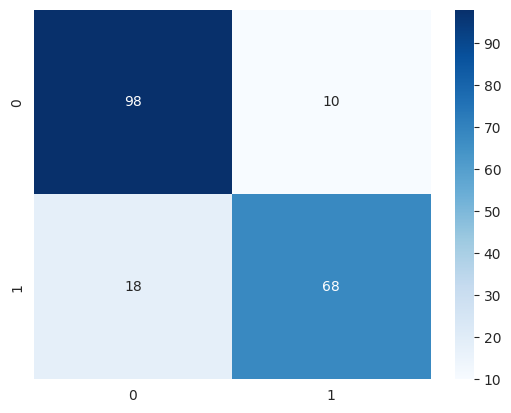

In [35]:
log_train, log_test = Auto_ml(X, Y, LogisticRegression, opt = 3)

Acurácia treino: 100.00%
Acurácia Teste: 77.84%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       108
           1       0.75      0.76      0.75        86

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194

--- Confusion Matrix ---


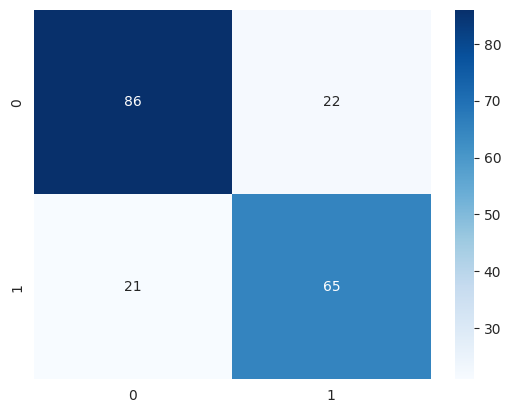

In [36]:
tree_train, tree_test = Auto_ml(X, Y, DecisionTreeClassifier)

Acurácia treino: 90.02%
Acurácia Teste: 88.14%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        93
           1       0.89      0.88      0.89       101

    accuracy                           0.88       194
   macro avg       0.88      0.88      0.88       194
weighted avg       0.88      0.88      0.88       194

--- Confusion Matrix ---


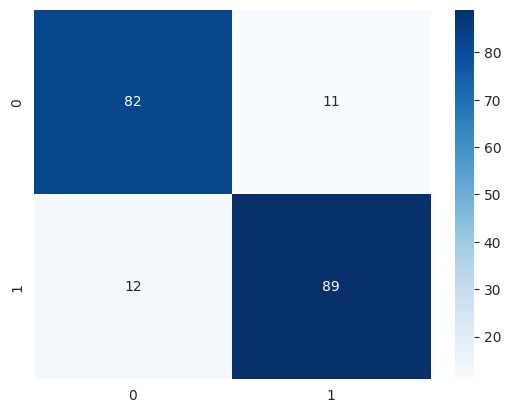

In [37]:
Ada_train, Ada_test = Auto_ml(X, Y, AdaBoostClassifier)

Acurácia treino: 78.05%
Acurácia Teste: 65.98%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       112
           1       0.60      0.61      0.60        82

    accuracy                           0.66       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.66      0.66      0.66       194

--- Confusion Matrix ---


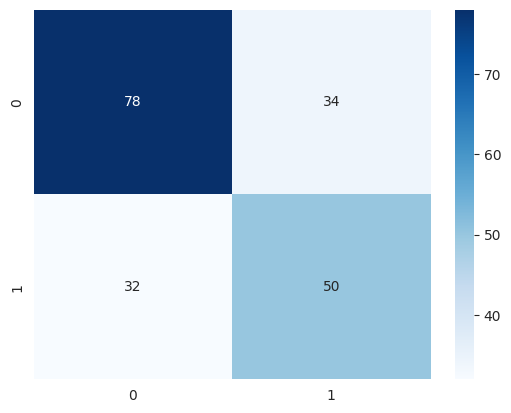

In [38]:
kn_train, kn_test = Auto_ml(X, Y, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 86.60%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        97
           1       0.87      0.87      0.87        97

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194

--- Confusion Matrix ---


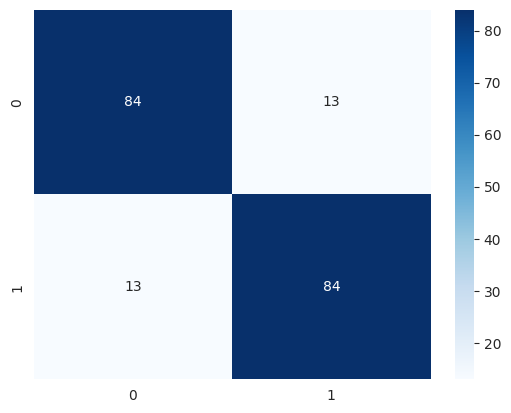

In [39]:
rand_train, rand_test = Auto_ml(X, Y, RandomForestClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 82.47%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.80      0.82      0.81        88

    accuracy                           0.82       194
   macro avg       0.82      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194

--- Confusion Matrix ---


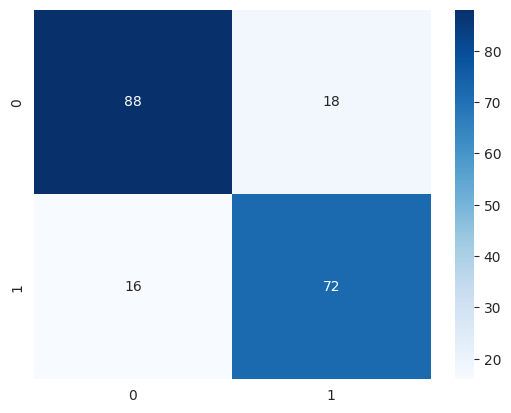

In [40]:
Boost_train, Boost_test = Auto_ml(X, Y, GradientBoostingClassifier, opt = 2)

In [41]:
Ac_test = [round(log_test,2), round(tree_test,2),
                  round(kn_test,2), round(rand_test,2), round(Ada_test,2), round(Boost_test,2)]
Ac_train = [round(log_train,2), round(tree_train,2), 
                    round(kn_train,2), round(rand_train,2),round(Ada_train,2), round(Boost_train,2)]


data = {'Modelos': ['Logistc Regression', 'Decision Tree', 'KNeighbors', 
                   'Random Forest Classifier', 'Ada Boost', 'XGBoost'], 
        'Acurácia Treino': Ac_train,
        'Acurácia Teste' : Ac_test}

resultados = pd.DataFrame(data)
resultados.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
resultados

,Modelos,Acurácia Treino,Acurácia Teste
4,Ada Boost,0.90,0.88
3,Random Forest Classifier,1.00,0.87
0,Logistc Regression,0.83,0.86
5,XGBoost,1.00,0.82
1,Decision Tree,1.00,0.78
2,KNeighbors,0.78,0.66


<Axes: >

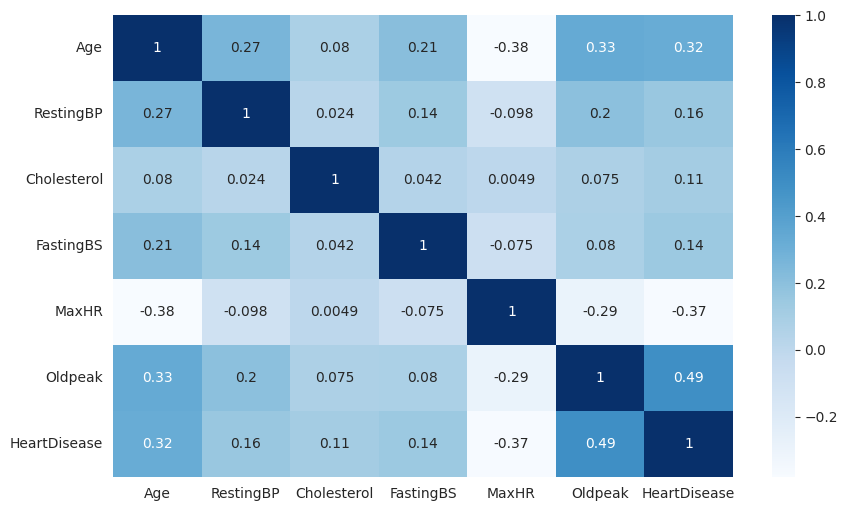

In [42]:
plt.figure(figsize = (10,6))
sns.heatmap(data = df3.corr(numeric_only = True, method = 'spearman'), annot = True, cmap = 'Blues')

# Aplicando padronização nos dados

In [43]:
def Auto_ml_scaled(X, Y, algoritmo, opt = 1): #Aplicação dos modelos de ML com StandardScaler()
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    
    scaler = StandardScaler()
    
    cols_scaled = X[numericas].columns
    
    x_train[cols_scaled] = scaler.fit_transform(x_train[cols_scaled])
    
    x_test[cols_scaled] = scaler.transform(x_test[cols_scaled])
    
    
    
    if opt == 1:
        ml = algoritmo()
        
    elif opt == 2:
        ml = algoritmo(n_estimators = 1000)
        
    elif opt == 3:
        ml = algoritmo(max_iter = 1000)
    
    ml.fit(x_train, y_train.values.ravel())
    
    score_train = ml.score(x_train, y_train)
    print(f"Acurácia treino: {score_train*100:.2f}%")
    
    score_test = ml.score(x_test, y_test)
    print(f"Acurácia Teste: {score_test*100:.2f}%")
    
    y_predict = ml.predict(x_test)
    
    print("--- Classification report ---")
    print(classification_report(y_test, y_predict))
    
    m_confusion = confusion_matrix(y_test, y_predict)
    print("--- Confusion Matrix ---")
    
    sns.heatmap(m_confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test
    

Acurácia treino: 84.70%
Acurácia Teste: 84.54%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        98
           1       0.86      0.82      0.84        96

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194

--- Confusion Matrix ---


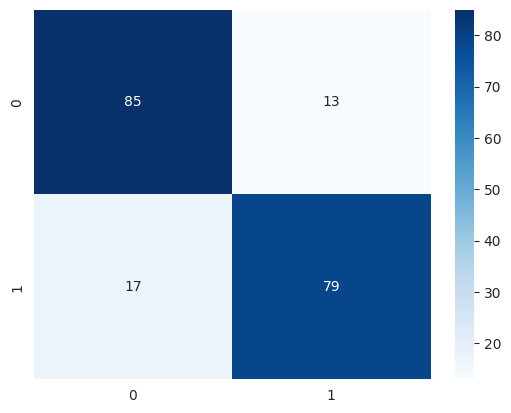

In [44]:
log_train_scaled, log_test_scaled = Auto_ml_scaled(X, Y, LogisticRegression, opt = 3)

Acurácia treino: 100.00%
Acurácia Teste: 78.87%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.78      0.78      0.78        94

    accuracy                           0.79       194
   macro avg       0.79      0.79      0.79       194
weighted avg       0.79      0.79      0.79       194

--- Confusion Matrix ---


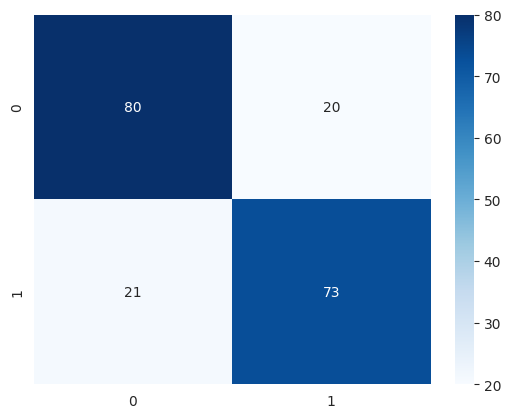

In [45]:
tree_train_scaled, tree_test_scaled = Auto_ml_scaled(X, Y, DecisionTreeClassifier)

Acurácia treino: 90.47%
Acurácia Teste: 87.63%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       109
           1       0.85      0.87      0.86        85

    accuracy                           0.88       194
   macro avg       0.87      0.88      0.87       194
weighted avg       0.88      0.88      0.88       194

--- Confusion Matrix ---


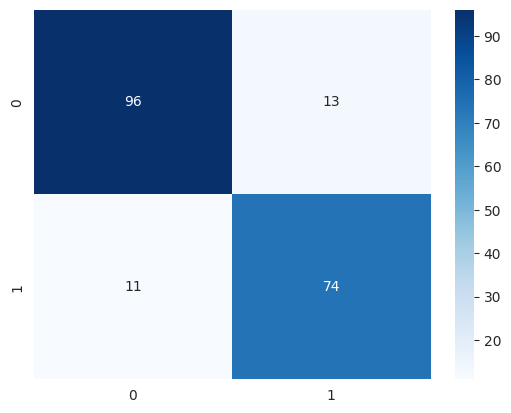

In [46]:
Ada_train_scaled, Ada_test_scaled = Auto_ml_scaled(X, Y, AdaBoostClassifier)

Acurácia treino: 89.58%
Acurácia Teste: 77.32%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.76      0.78      0.77        94

    accuracy                           0.77       194
   macro avg       0.77      0.77      0.77       194
weighted avg       0.77      0.77      0.77       194

--- Confusion Matrix ---


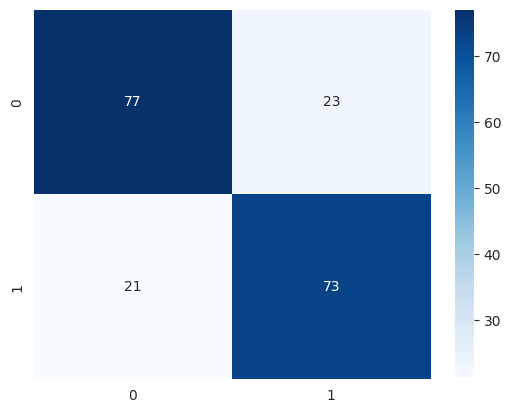

In [47]:
kn_train_scaled, kn_test_scaled = Auto_ml_scaled(X, Y, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 90.21%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       105
           1       0.89      0.90      0.89        89

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194

--- Confusion Matrix ---


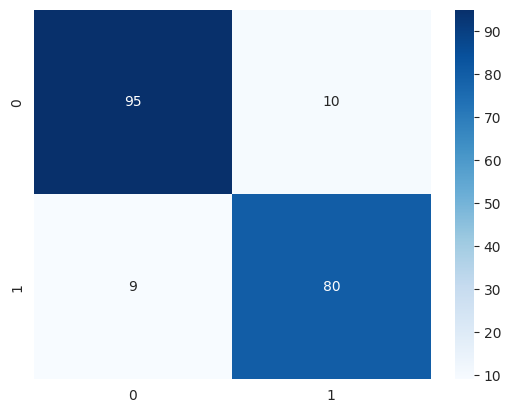

In [48]:
rand_train_scaled, rand_test_scaled = Auto_ml_scaled(X, Y, RandomForestClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 81.44%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.75      0.86      0.80        85

    accuracy                           0.81       194
   macro avg       0.81      0.82      0.81       194
weighted avg       0.82      0.81      0.82       194

--- Confusion Matrix ---


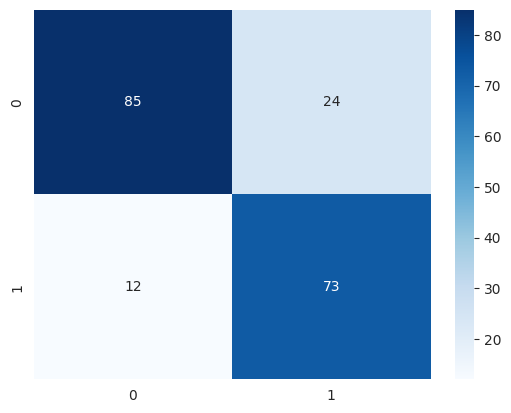

In [49]:
Boost_train_scaled, Boost_test_scaled = Auto_ml_scaled(X, Y, GradientBoostingClassifier, opt = 2)

In [50]:
Ac_test_scaled = [round(log_test_scaled,2), round(tree_test_scaled,2),
                  round(kn_test_scaled,2), round(rand_test_scaled,2), round(Ada_test_scaled,2),round(Boost_test_scaled,2)]
Ac_train_scaled = [round(log_train_scaled,2), round(tree_train_scaled,2), 
                    round(kn_train_scaled,2), round(rand_train_scaled,2),round(Ada_train_scaled,2), round(Boost_train_scaled,2)]


data = {'Modelos_scaled': ['Logistc Regression', 'Decision Tree', 'KNeighbors', 
                   'Random Forest Classifier', 'Ada Boost', 'XGBoost'], 
        'Acurácia Treino_scaled': Ac_train_scaled,
        'Acurácia Teste_scaled' : Ac_test_scaled}

resultados_scaled = pd.DataFrame(data)
resultados.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
resultados_scaled

,Modelos_scaled,Acurácia Treino_scaled,Acurácia Teste_scaled
0,Logistc Regression,0.85,0.85
1,Decision Tree,1.00,0.79
2,KNeighbors,0.90,0.77
3,Random Forest Classifier,1.00,0.90
4,Ada Boost,0.90,0.88
5,XGBoost,1.00,0.81


In [51]:
#df com todos os resultados até aqui
frames = [resultados, resultados_scaled]

c_models = pd.concat(frames, axis=1)
c_models.drop(columns=['Modelos'], inplace = True)
c_models.rename(columns=({'Modelos_scaled': 'Modelos'}), inplace = True)
c_models.set_index('Modelos', inplace = True)

In [52]:
c_models

,Acurácia Treino,Acurácia Teste,Acurácia Treino_scaled,Acurácia Teste_scaled
Modelos,,,,
Ada Boost,0.90,0.88,0.90,0.88
Random Forest Classifier,1.00,0.87,1.00,0.90
Logistc Regression,0.83,0.86,0.85,0.85
XGBoost,1.00,0.82,1.00,0.81
Decision Tree,1.00,0.78,1.00,0.79
KNeighbors,0.78,0.66,0.90,0.77


## Testando transformação com minmaxscaler():

In [53]:
def Auto_ml_mms(X, Y, algoritmo, opt = 1): #Aplicação dos modelos de ML com StandardScaler()
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    
    scaler = MinMaxScaler()
    
    cols_scaled = X[numericas].columns
    
    x_train = scaler.fit_transform(x_train[cols_scaled])
    x_test = scaler.transform(x_test[cols_scaled])
    
    
    if opt == 1:
        ml = algoritmo()
        
    elif opt == 2:
        ml = algoritmo(n_estimators = 1000)
        
    elif opt == 3:
        ml = algoritmo(max_iter = 1000)
    
    ml.fit(x_train, y_train.values.ravel())
    
    score_train = ml.score(x_train, y_train)
    print(f"Acurácia treino: {score_train*100:.2f}%")
    
    score_test = ml.score(x_test, y_test)
    print(f"Acurácia Teste: {score_test*100:.2f}%")
    
    y_predict = ml.predict(x_test)
    
    print("--- Classification report ---")
    print(classification_report(y_test, y_predict))
    
    m_confusion = confusion_matrix(y_test, y_predict)
    print("--- Confusion Matrix ---")
    
    sns.heatmap(m_confusion, annot = True, cmap = 'Blues')
    
    return score_train, score_test
    

Acurácia treino: 83.81%
Acurácia Teste: 83.51%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.83      0.81      0.82        89

    accuracy                           0.84       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.83      0.84      0.83       194

--- Confusion Matrix ---


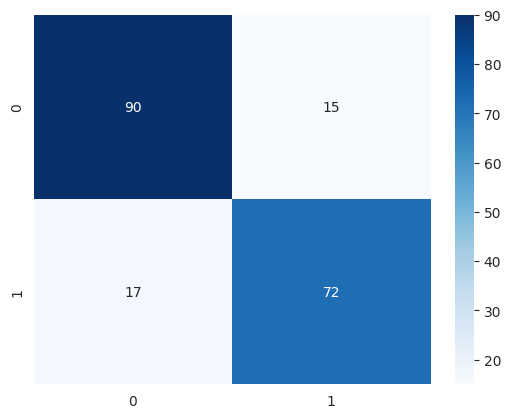

In [54]:
log_train_mms, log_test_mms = Auto_ml_scaled(X, Y, LogisticRegression, opt = 3)

Acurácia treino: 100.00%
Acurácia Teste: 66.49%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       102
           1       0.64      0.68      0.66        92

    accuracy                           0.66       194
   macro avg       0.67      0.67      0.66       194
weighted avg       0.67      0.66      0.67       194

--- Confusion Matrix ---


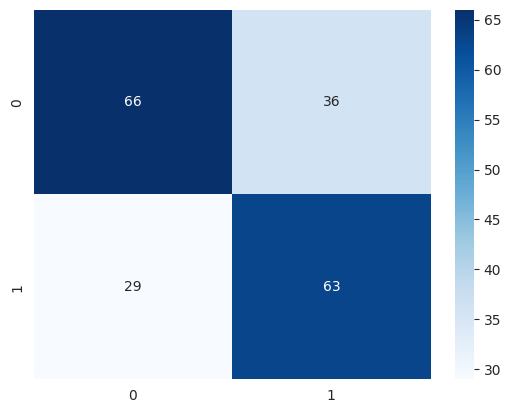

In [55]:
tree_train_mms, tree_test_mms = Auto_ml_mms(X, Y, DecisionTreeClassifier)

Acurácia treino: 80.49%
Acurácia Teste: 71.65%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       107
           1       0.69      0.68      0.68        87

    accuracy                           0.72       194
   macro avg       0.71      0.71      0.71       194
weighted avg       0.72      0.72      0.72       194

--- Confusion Matrix ---


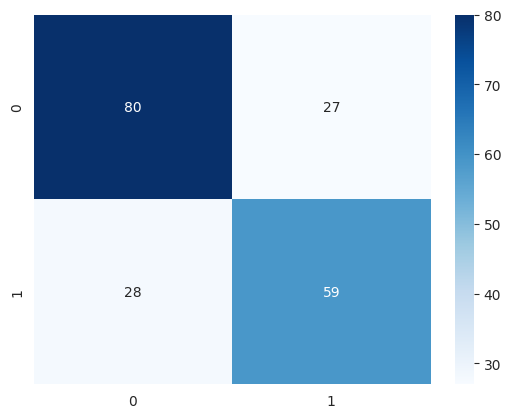

In [56]:
Ada_train_mms, Ada_test_mms = Auto_ml_mms(X, Y, AdaBoostClassifier)

Acurácia treino: 80.93%
Acurácia Teste: 76.29%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       102
           1       0.85      0.61      0.71        92

    accuracy                           0.76       194
   macro avg       0.78      0.76      0.75       194
weighted avg       0.78      0.76      0.76       194

--- Confusion Matrix ---


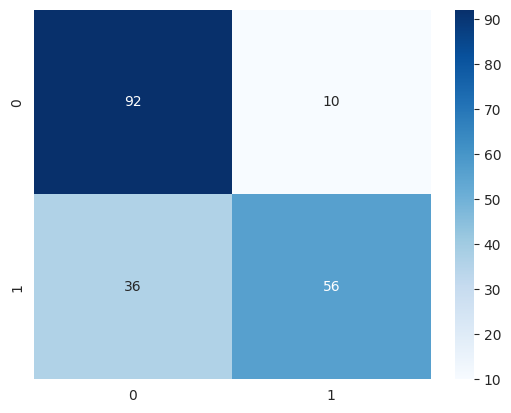

In [57]:
kn_train_mms, kn_test_mms = Auto_ml_mms(X, Y, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 72.68%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       106
           1       0.70      0.69      0.70        88

    accuracy                           0.73       194
   macro avg       0.72      0.72      0.72       194
weighted avg       0.73      0.73      0.73       194

--- Confusion Matrix ---


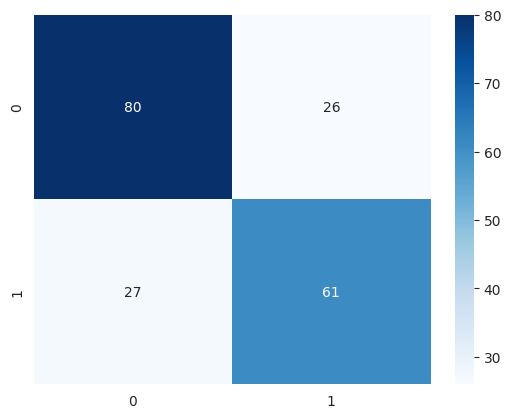

In [58]:
rand_train_mms, rand_test_mms = Auto_ml_mms(X, Y, RandomForestClassifier)

Acurácia treino: 100.00%
Acurácia Teste: 64.95%
--- Classification report ---
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       101
           1       0.63      0.67      0.65        93

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.65      0.65      0.65       194

--- Confusion Matrix ---


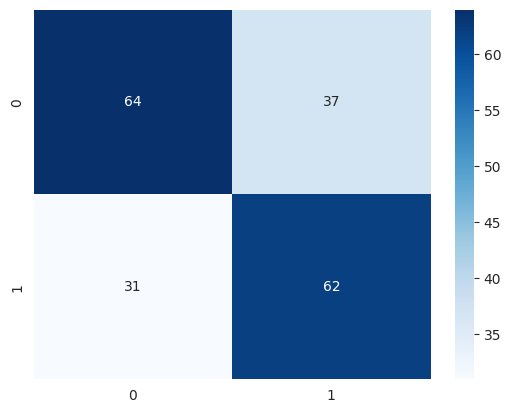

In [59]:
Boost_train_mms, Boost_test_mms = Auto_ml_mms(X, Y, GradientBoostingClassifier, opt = 2)

In [60]:
Ac_test_mms = [round(log_test_mms,2), round(tree_test_mms,2),
                  round(kn_test_mms,2), round(rand_test_mms,2), round(Ada_test_mms,2),round(Boost_test_mms,2)]
Ac_train_mms = [round(log_train_mms,2), round(tree_train_mms,2), 
                    round(kn_train_mms,2), round(rand_train_mms,2),round(Ada_train_mms,2), round(Boost_train_mms,2)]


data = {'Modelos_mms': ['Logistc Regression', 'Decision Tree', 'KNeighbors', 
                   'Random Forest Classifier', 'Ada Boost', 'XGBoost'], 
        'Acurácia Treino_mms': Ac_train_mms,
        'Acurácia Teste_mms' : Ac_test_mms}

resultados_mms = pd.DataFrame(data)
resultados_mms.sort_values(by = 'Acurácia Teste_mms', ascending = False, inplace = True)
resultados_mms

,Modelos_mms,Acurácia Treino_mms,Acurácia Teste_mms
0,Logistc Regression,0.84,0.84
2,KNeighbors,0.81,0.76
3,Random Forest Classifier,1.00,0.73
4,Ada Boost,0.80,0.72
1,Decision Tree,1.00,0.66
5,XGBoost,1.00,0.65


In [61]:
c_models[['Acurácia Treino_mms', 'Acurácia Teste_mms']] = resultados_mms[['Acurácia Treino_mms', 'Acurácia Teste_mms']].values

In [62]:
c_models

,Acurácia Treino,Acurácia Teste,Acurácia Treino_scaled,Acurácia Teste_scaled,Acurácia Treino_mms,Acurácia Teste_mms
Modelos,,,,,,
Ada Boost,0.90,0.88,0.90,0.88,0.84,0.84
Random Forest Classifier,1.00,0.87,1.00,0.90,0.81,0.76
Logistc Regression,0.83,0.86,0.85,0.85,1.00,0.73
XGBoost,1.00,0.82,1.00,0.81,0.80,0.72
Decision Tree,1.00,0.78,1.00,0.79,1.00,0.66
KNeighbors,0.78,0.66,0.90,0.77,1.00,0.65


## Conclusão:

Os quatro modelos com melhor performance se revezam a cada execusão desse notebook, portanto, talvez uma análise mais refinada da etapa anterior e também engenharia de atributos seja uma boa opção. Pois o objetivo é levar apenas um modelo para a otimização de hiperparâmetros.